<a href="https://colab.research.google.com/github/Saliyan-moksh081/Walmart_Case_Study/blob/master/Walmart_casestudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

Loading the data set - walmart data set

In [ ]:
data = pd.read_csv('/content/walmart_data.csv')
data.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,7969.0
5,1000003,P00193542,M,26-35,15.0,A,3,0.0,1.0,15227.0
6,1000004,P00184942,M,46-50,7.0,B,2,1.0,1.0,19215.0
7,1000004,P00346142,M,46-50,7.0,B,2,1.0,1.0,15854.0
8,1000004,P0097242,M,46-50,7.0,B,2,1.0,1.0,15686.0
9,1000005,P00274942,M,26-35,20.0,A,1,1.0,8.0,7871.0


Data basic operations and data structure check

In [ ]:
print("the basic information of the data")
data.info()
print("===================================================================================================")

print("check the data shape")
shape = data.shape
print(shape)
print("===================================================================================================")

print("check the data description")
decs = data.describe()
print(decs)
print("===================================================================================================")

print("check the data null values")
isnull = data.isnull().sum()
print(isnull)
print("===================================================================================================")

print("check the data unique values counts")
valcounts = data.value_counts()
print(valcounts)
print("===================================================================================================")

print("check the data uniue values")
uniq = data.nunique()
print(uniq)
print("===================================================================================================")


the basic information of the data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425735 entries, 0 to 425734
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     425735 non-null  int64  
 1   Product_ID                  425734 non-null  object 
 2   Gender                      425734 non-null  object 
 3   Age                         425734 non-null  object 
 4   Occupation                  425734 non-null  float64
 5   City_Category               425734 non-null  object 
 6   Stay_In_Current_City_Years  425734 non-null  object 
 7   Marital_Status              425734 non-null  float64
 8   Product_Category            425734 non-null  float64
 9   Purchase                    425734 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 32.5+ MB
check the data shape
(425735, 10)
check the data description
            User_ID     Occupation 

Data Analysis and Visualization

1. Gender-Based Spending Analysis - Lets check this


the spending avaerage according to gender Gender
F    8807.260041
M    9500.024896
Name: Purchase, dtype: float64


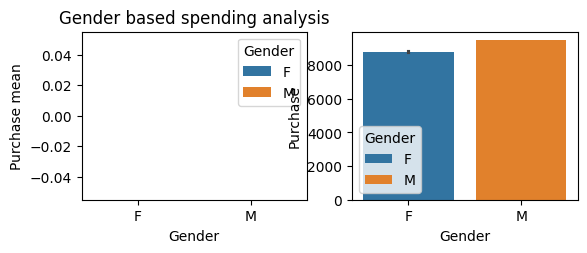

<Figure size 800x500 with 0 Axes>

In [ ]:
Spending_Gender = data.groupby('Gender')['Purchase'].mean()
print("the spending avaerage according to gender",Spending_Gender)
plt.subplot(2,2,1)
sns.barplot(x=data['Gender'], y=Spending_Gender,hue=data['Gender'])
plt.xlabel("Gender")
plt.ylabel("Purchase mean")
plt.title("Gender based spending analysis")
plt.subplot(2,2,2)
plt.figsize=(10,10)

sns.barplot(x=data['Gender'], y=data['Purchase'],hue=data['Gender'])
plt.xlabel("Gender")
plt.ylabel("Purchase")
plt.figure(figsize=(8, 5))
plt.show()



Insights : Here we can see that the spending average of Male is higher than compared to female gender

2.Confidence Interval Calculation for Gender-Based Spending

Confidence Interval for Male Spending: (9482.558595517556, 9517.491195875824)
Confidence Interval for Female Spending: (8778.692907426332, 8835.827174638653)


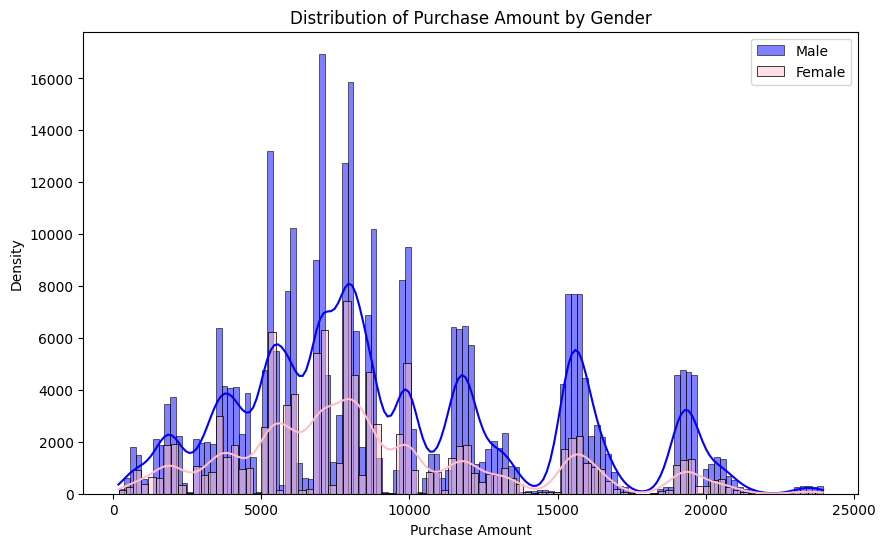

In [ ]:
# Define a function to calculate confidence intervals
def confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    se = stats.sem(data)
    margin = se * stats.t.ppf((1 + confidence) / 2., len(data)-1)
    return mean - margin, mean + margin

# Calculate confidence intervals for male and female
male_spending = data[data['Gender'] == 'M']['Purchase']
female_spending = data[data['Gender'] == 'F']['Purchase']

ci_male = confidence_interval(male_spending)
ci_female = confidence_interval(female_spending)
print("Confidence Interval for Male Spending:", ci_male)
print("Confidence Interval for Female Spending:", ci_female)
print("===================================================================")


plt.figure(figsize=(10, 6))
sns.histplot(male_spending, kde=True, color='blue', label='Male')
sns.histplot(female_spending, kde=True, color='pink', label='Female')
plt.title("Distribution of Purchase Amount by Gender")
plt.xlabel("Purchase Amount")
plt.ylabel("Density")
plt.legend()
plt.show()


Insights : Here we can see that the Confidence interval is more for Male purchase frequency
Compared to male .Female has less confidence interval for the same


3.Marital Status Comparison

Average spending by marital status:
 Marital_Status
0.0    9325.864007
1.0    9334.745443
Name: Purchase, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

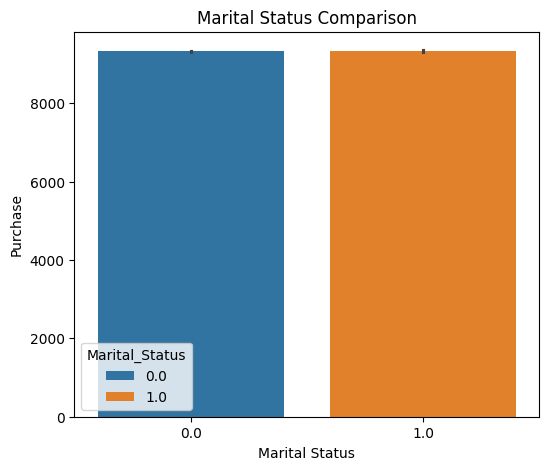

In [ ]:
avg_spending_marital = data.groupby('Marital_Status')['Purchase'].mean()
print("Average spending by marital status:\n", avg_spending_marital)
print("=================================================================")
plt.figure(figsize=(6,5))
sns.barplot(x=data['Marital_Status'], y=data['Purchase'],hue=data['Marital_Status'])
plt.xlabel("Marital Status")
plt.ylabel("Purchase")
plt.title("Marital Status Comparison")
plt.show

Insights: Here we can see that that there is no much difference in the purchase frequency between our married and non married people


4.Check Overlapping of Confidence Intervals

In [ ]:
overlap = not (ci_male[1] < ci_female[0] or ci_female[1] < ci_male[0])
print("Do confidence intervals overlap?", overlap)

Do confidence intervals overlap? False


5.Check Spending anaalysis based on the AGe


the average spending distribution based on the Age Age
0-17     9032.204054
18-25    9227.231924
26-35    9304.337384
36-45    9403.885214
46-50    9281.198461
51-55    9629.320519
55+      9454.352668
Name: Purchase, dtype: float64


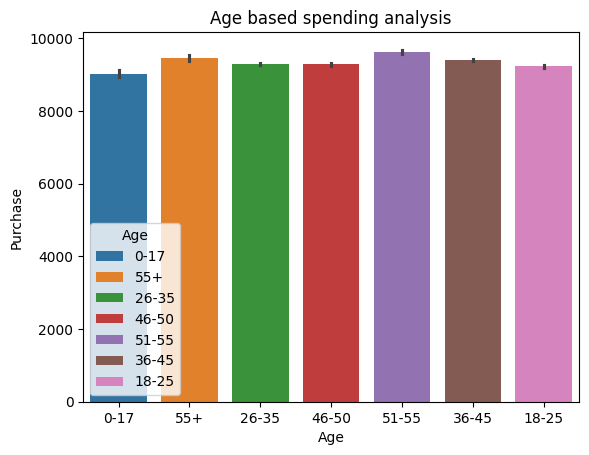

In [ ]:
Age_spending = data.groupby('Age')['Purchase'].mean()
print("the average spending distribution based on the Age",Age_spending)
print("============================================================================")
sns.barplot(x=data['Age'],y=data['Purchase'],hue=data['Age'])
plt.xlabel("Age")
plt.ylabel("Purchase")
plt.title("Age based spending analysis")
plt.show()

Insights :
Here by this  barplot we can see that Age group between 51-55 has more people who purchase the highest.
Age group from 0-17 has the least amount of purchase compared to other age group


6.Confidence Interval for Each Age Group

In [ ]:
age_groups = data['Age'].unique()
for age_group in age_groups:
    age_group_spending = data[data['Age'] == age_group]['Purchase']
    ci_age = confidence_interval(age_group_spending)
    print(f"Confidence Interval for Age Group {age_group}:", ci_age)

Confidence Interval for Age Group 0-17: (8939.92159442593, 9124.486512753734)
Confidence Interval for Age Group 55+: (9379.513216994517, 9529.192119711905)
Confidence Interval for Age Group 26-35: (9280.707446257182, 9327.967322520433)
Confidence Interval for Age Group 46-50: (9229.839560437145, 9332.557362290385)
Confidence Interval for Age Group 51-55: (9572.084786780035, 9686.556250892574)
Confidence Interval for Age Group 36-45: (9370.452588352546, 9437.317840347972)
Confidence Interval for Age Group 18-25: (9192.071719313397, 9262.392128876108)
Confidence Interval for Age Group nan: (nan, nan)


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


7.Confidence Interval for Marital Status

In [ ]:
married_spending = data[data['Marital_Status'] == 1]['Purchase']
unmarried_spending = data[data['Marital_Status'] == 0]['Purchase']

ci_married = confidence_interval(married_spending)
ci_unmarried = confidence_interval(unmarried_spending)
print("Confidence Interval for Married Customers:", ci_married)
print("Confidence Interval for Unmarried Customers:", ci_unmarried)

Confidence Interval for Married Customers: (9311.399822331225, 9358.09106339175)
Confidence Interval for Unmarried Customers: (9306.39087384428, 9345.337140409221)


8.Impact of City Category on Spending

Average spending by city category:
 City_Category
A    8949.071294
B    9192.103318
C    9846.812079
Name: Purchase, dtype: float64


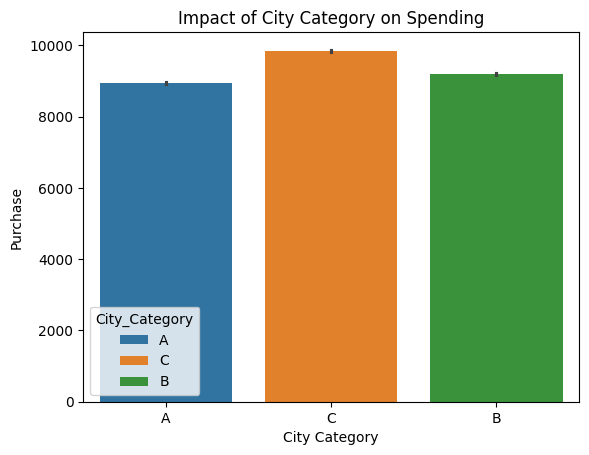

In [ ]:
avg_spending_city = data.groupby('City_Category')['Purchase'].mean()
print("Average spending by city category:\n", avg_spending_city)
print("============================================================================")
sns.barplot(x=data['City_Category'], y=data['Purchase'],hue=data['City_Category'])
plt.xlabel("City Category")
plt.ylabel("Purchase")
plt.title("Impact of City Category on Spending")
plt.show()

Insights
Here we can see that the most purchase for walmart is done on city C other than the two cities

9. Correlation Analysis

Correlation Matrix:
                             Purchase  Occupation  Stay_In_Current_City_Years
Purchase                    1.000000    0.021020                    0.001489
Occupation                  0.021020    1.000000                    0.020887
Stay_In_Current_City_Years  0.001489    0.020887                    1.000000


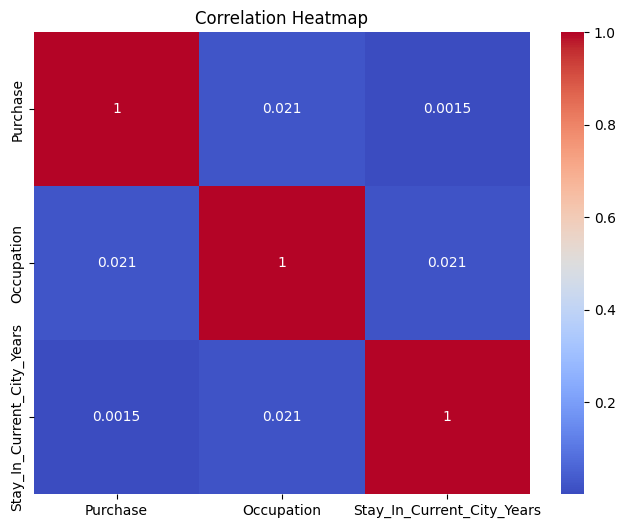

In [ ]:
#convert the city stay from object to float
city_stay_mapping = {'1': 1, '2': 2, '3': 3, '4+': 4}
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].map(city_stay_mapping)

correlation_matrix = data[['Purchase', 'Occupation', 'Stay_In_Current_City_Years']].corr()
print("Correlation Matrix:\n", correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

10.Check which product category has the highest purchases rate

Average spending by product category:
 Product_Category
1.0     13604.262345
2.0     11257.316694
3.0     10101.134350
4.0      2328.738049
5.0      6239.907703
6.0     15862.323061
7.0     16384.548676
8.0      7497.131460
9.0     15407.888889
10.0    19701.664581
11.0     4681.317188
12.0     1349.521273
13.0      722.832833
14.0    13101.261421
15.0    14731.922575
16.0    14747.989229
17.0    10132.384615
18.0     2974.039501
Name: Purchase, dtype: float64


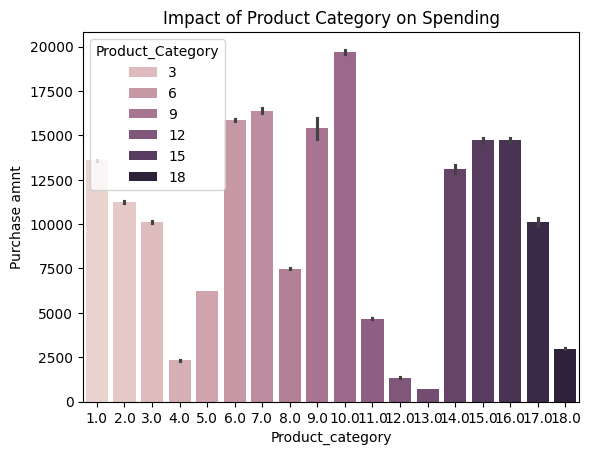

In [ ]:
data['Product_Category'].value_counts()
product_category_purchase = data.groupby('Product_Category')['Purchase'].mean()
print("Average spending by product category:\n", product_category_purchase)
sns.barplot(x=data['Product_Category'], y=data['Purchase'],hue=data['Product_Category'])
plt.xlabel("Product_category")
plt.ylabel("Purchase amnt")
plt.title("Impact of Product Category on Spending")
plt.show()

By this plot we can see that
1.the Product category 10 has the highest amount of purchase
2.Product 12 and 13 are having the less amount of purchase.

Recomendations:
1. Walmart has to get some discounts on female products to increase the buying average of females
2.walmart can remove the products that falls in 12 and 13 categories as it has very less purchase
3. Walmart can focus more on the people from City C as the number of most purchases are from City C
4. Walmart can introduce products that are affordable by the age group > 30 as to maximize the profit